In [1]:
import os
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras.utils import np_utils
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import  Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.datasets import cifar10
from keras.callbacks import ModelCheckpoint

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def make_model():
    k = float(np.random.rand()*1+0.2)
    print ('## k = %.3f' % k)
    winit1 = k/np.sqrt(5*5*1)
    winit2 = k/np.sqrt(5*5*64)
    winit3 = k/np.sqrt(5*5*128)


    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=5, padding='same',
                    data_format='channels_first',
                    use_bias=False, 
                    kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=winit1),
                    activation='relu', input_shape=(96,96,1)))
    model.add(MaxPooling2D(pool_size=2, strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=5, padding='same',
                    data_format='channels_first',
                    use_bias=False,
                    kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=winit2),
                    activation='relu'))
    model.add(MaxPooling2D(pool_size=2, strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=5, padding='same',
                    data_format='channels_first',
                    use_bias=False,
                    kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=winit3),
                    activation='relu'))
    model.add(MaxPooling2D(pool_size=12, strides=(12,12)))
    model.add(Flatten())

    winitD1 = k/np.sqrt(4032)
    winitD2 = k/np.sqrt(300)
    model.add(Dropout(0.5))
    model.add(Dense(300, activation='relu',
                    kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05),
                    bias_initializer='Ones'))

    model.add(Dense(8, activation='softmax',
    kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=winitD2),
    bias_initializer='Zeros'))

    print(model.summary())
    
    # compile the model
    sgd = keras.optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=sgd,
             metrics=['accuracy'])

    return model

In [3]:
def make_cv_folds(X, y, folds, fold_num):
    X_train = []
    y_train = []
    X_valid = []
    y_valid = []

    for index, fold in enumerate(folds):
        if fold == fold_num:
            X_valid.append(X[index])
            y_valid.append(y[index])
        else:
            X_train.append(X[index])
            y_train.append(y[index])
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_valid = np.array(X_valid)
    y_valid = np.array(y_valid)


    return X_train, y_train, X_valid, y_valid

In [4]:
# Data loading
dataset_path = 'save_data/npy_files_nwh'
result_path = 'result/'
X = np.load(os.path.join(dataset_path,'X.npy'))
y = np.load(os.path.join(dataset_path,'y.npy'))
folds = np.load(os.path.join(dataset_path,'folds.npy'))

# rescale [0,255] -> [0,2]    
X = X.astype('float32')/255*2

# one-hot encode the labels
num_classes = len(np.unique(y))
y = keras.utils.to_categorical(y, num_classes)

In [8]:
result_path = './result/test_nwh'
val_fold = 0
X_train, y_train, X_valid, y_valid = make_cv_folds(X, y, folds, val_fold)

print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)


# printing number of training, validation, and test images
print(X_train.shape[0], 'train samples')
#print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')
#X_test = X_test.astype('float32')/255
model = make_model()
filepath="weights-{epoch:02d}-{val_acc:.2f}.hdf5"
filepath = os.path.join(result_path, filepath)
checkpointer = ModelCheckpoint(filepath=filepath,
                        verbose=1, save_best_only=True)

hist = model.fit(X_train, y_train, batch_size=64, epochs=100,
            validation_data=(X_valid, y_valid),
            callbacks=[checkpointer], verbose=2, shuffle=True)

X_train shape : (1175, 96, 96, 1)
y_train shape : (1175, 8)
1175 train samples
132 validation samples
## k = 1.199
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 96, 1)         153600    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 48, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 48, 1)        102400    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 24, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 256, 24, 1)        409600    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 21, 2, 1)          0         
___________________________

Epoch 46/100
Epoch 00046: val_loss did not improve
 - 2s - loss: 0.4774 - acc: 0.8272 - val_loss: 1.0503 - val_acc: 0.6970
Epoch 47/100
Epoch 00047: val_loss did not improve
 - 2s - loss: 0.4754 - acc: 0.8213 - val_loss: 0.8201 - val_acc: 0.7045
Epoch 48/100
Epoch 00048: val_loss did not improve
 - 2s - loss: 0.5007 - acc: 0.8196 - val_loss: 0.8500 - val_acc: 0.7652
Epoch 49/100
Epoch 00049: val_loss did not improve
 - 2s - loss: 0.4868 - acc: 0.8306 - val_loss: 0.8059 - val_acc: 0.7273
Epoch 50/100
Epoch 00050: val_loss did not improve
 - 2s - loss: 0.4968 - acc: 0.8153 - val_loss: 0.9226 - val_acc: 0.7652
Epoch 51/100
Epoch 00051: val_loss did not improve
 - 2s - loss: 0.5609 - acc: 0.7847 - val_loss: 0.6957 - val_acc: 0.7803
Epoch 52/100
Epoch 00052: val_loss did not improve
 - 2s - loss: 0.4233 - acc: 0.8374 - val_loss: 0.7179 - val_acc: 0.7879
Epoch 53/100
Epoch 00053: val_loss did not improve
 - 2s - loss: 0.4575 - acc: 0.8255 - val_loss: 1.0879 - val_acc: 0.6894
Epoch 54/100
Epo

In [15]:
hist.history['acc'][34]

0.753191489767521

In [16]:
hist.history['val_acc'][34]

0.7803030303030303

In [17]:
%matplotlib inline

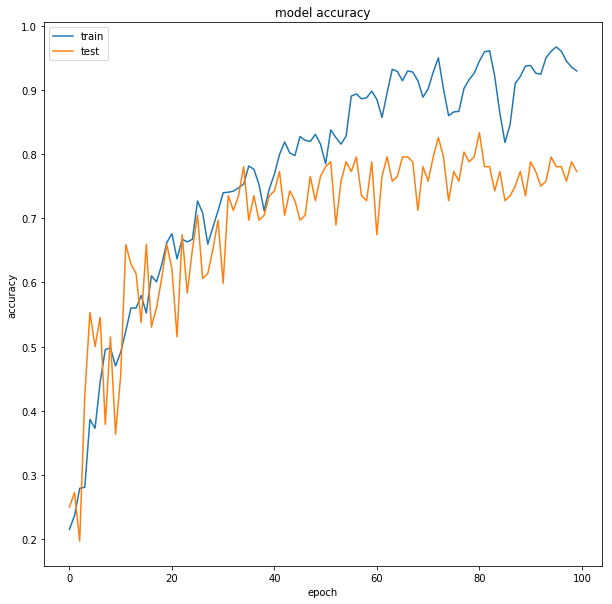

In [18]:
plt.figure(figsize=(10,10))
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [19]:
with open('./result/test_nwh/model_architecture.json', 'w') as f:
    f.write(model.to_json())

In [20]:
from keras.models import model_from_json

In [22]:
with open('./result/test_nwh/model_architecture.json', 'r') as f:
    model2 = model_from_json(f.read())

model2.load_weights('./result/test_nwh/weights-35-0.78.hdf5')

In [23]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 96, 1)         153600    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 48, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 48, 1)        102400    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 24, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 256, 24, 1)        409600    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 21, 2, 1)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 42)                0         
__________